In [168]:
# importing dependencies 

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf 
from tensorflow.python.framework import ops

%matplotlib inline

## Visualize dataframe

In [169]:
# importing data using pandas 
dfz = pd.read_excel('BTC daily_database.xlsx', sheet_name=0)
# testing the input is correct or not
print(dfz.head())

        Date  Price       RSI  Stedev from 20 MA  MACD n.f  50MA_N.F.  \
0 2011-12-16   3.25  0.514151           0.591527  1.594689   0.500194   
1 2011-12-18   3.25  0.443243           0.516482  1.489778   0.571086   
2 2011-12-19   3.50  0.511962           1.311777  1.473728   1.266368   
3 2011-12-20   4.75  0.822695           3.461711  1.840524   3.831441   
4 2011-12-21   4.38  0.753247           2.180044  1.969366   2.760808   

   20D PMO  35D PMO        ADX  actions  y-hat  Unnamed: 11  Unnamed: 12  
0    3.270     0.59  69.772809      NaN      2            1  2157.000000  
1    3.690     0.46  70.038037      NaN      2            1     0.912437  
2    4.275     0.67  70.475308      NaN      2            1          NaN  
3    5.140     1.55  68.503186      NaN      2            1          NaN  
4    5.910     1.28  66.671929      NaN      2            1          NaN  


## Randomize sampling

In [170]:
# shuffler() will read the data and randomly organizes it 
def shuffler(filename):
  # Read an Excel table into a pandas DataFrame
  # takes the first sheet and header
    
  dfs = pd.read_excel(filename, sheet_name=0, header=0)
  # return the pandas dataframe
  # np.random.permutation shuffles the data points 
  # dfs will clean the data by placing NaN at x-features that have no data 
  return dfs.reindex(np.random.permutation(dfs.index))

In [171]:
# randomizes the data and saves it in df
df = shuffler('BTC daily_database.xlsx')

# prints the first 5 rows of the data table
print(df.head())

           Date     Price       RSI  Stedev from 20 MA  MACD n.f  50MA_N.F.  \
516  2013-05-16    108.96  0.442356          -0.765256 -0.789252  -0.364618   
487  2013-04-17     67.85  0.428367          -1.246794 -1.098582  -0.232063   
1292 2015-07-04    256.06  0.629606           1.151252  1.678114   1.818851   
1555 2016-03-23    416.39  0.547678           0.763000 -0.302829   0.402991   
2223 2018-01-20  11560.82  0.214762          -1.424122 -1.351608  -1.421821   

      20D PMO  35D PMO        ADX  actions  y-hat  Unnamed: 11  Unnamed: 12  
516    16.650     0.06  16.081979      NaN      2            1          NaN  
487    37.995     2.52  41.100379      0.0      0            0          NaN  
1292    1.410     0.25  22.460306      NaN      2            1          NaN  
1555    2.465     0.08  25.931518      NaN      2            1          NaN  
2223    4.865    -0.95  21.025905      NaN      2            1          NaN  


## Input dataframe

In [172]:
# converts to numpy array using as_matrix()
# use iloc() to get location 
inputX = df.iloc[:,2:9 ].as_matrix()

# transposes inputX
inputX = inputX.T

# converts to numpy array using as_matrix()
# use iloc() to get location 
inputY = df.iloc[:, 10:11].as_matrix()

# transposes inputY
inputY = inputY.T

print("inputX shape: " + str(inputX.shape))
print("number of training samples = "+ str(inputX.shape[1]))
print("number of variables = " + str(inputX.shape[0]))
print(inputX)
print(inputY.shape)

inputX shape: (7, 2363)
number of training samples = 2363
number of variables = 7
[[  0.44235608   0.4283674    0.62960623 ...,   0.79412744   0.91489362
    0.4248519 ]
 [ -0.76525589  -1.24679374   1.15125196 ...,   1.68489429   2.46383243
   -0.30144387]
 [ -0.78925172  -1.09858249   1.67811381 ...,   2.5891059    2.55774775
    0.56777981]
 ..., 
 [ 16.65        37.995        1.41       ...,  37.52         0.575       -6.86      ]
 [  0.06         2.52         0.25       ...,   4.98         0.21        -0.66      ]
 [ 16.08197877  41.10037922  22.46030628 ...,  27.67111225  28.53573139
   14.74786053]]
(1, 2363)


In [173]:
inputY

array([[2, 0, 2, ..., 2, 2, 2]])

## Seperating to train and test datasets

In [174]:
# selects trainning data 
trainX = inputX[:, : -470]
trainY = inputY[:, : -470]

# selects test data 
testX = inputX[:, -470: ]
testY = inputY[:, -470: ]

# verifies the shapes 
print("trainX's shape: " + str(trainX.shape))
print("testX's shape: " + str(testX.shape))
print("trainX's shape: " + str(trainY.shape))
print("testY's shape: " + str(testY.shape))


trainX's shape: (7, 1893)
testX's shape: (7, 470)
trainX's shape: (1, 1893)
testY's shape: (1, 470)


## Layer size inputs 

In [193]:
# size of input layer
n_x = inputX.shape[0]

# amount of neuron for first hidden layer
n_h = 100

# output layer 
n_y = inputY.shape[0]

print("n_x's shape = " + str(n_x))
print("first layer(n_h)'s shape = " + str(n_h))
print("n_y's output = " + str(n_y))

n_x's shape = 7
first layer(n_h)'s shape = 100
n_y's output = 1


## Create placeholder


In [176]:
# Creates the placeholders for the tensorflow session.
def create_placeholders(n_x, n_y):
    
    # creates placholder for x and y that batch size can be any size
    X = tf.placeholder(tf.float32, shape = [n_x,None])
    Y = tf.placeholder(tf.float32, shape = [n_y, 1, None])  
    return X, Y

In [177]:
X, Y = create_placeholders(n_x,n_y)
print ("X = " + str(X))
print(X.shape)
print ("Y = " + str(Y))

X = Tensor("Placeholder_2:0", shape=(7, ?), dtype=float32)
(7, ?)
Y = Tensor("Placeholder_3:0", shape=(1, 1, ?), dtype=float32)


## Initialize parameters

In [194]:
#  Initializes weight parameters to build a neural network with tensorflow  
def initialize_parameters(n_x, n_h):
    #tf.set_random_seed()
    
    # Layer 1 (Input Layer)
    W1 = tf.get_variable("W1", [n_h,n_x], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b1 = tf.get_variable("b1", [n_h,1], initializer = tf.zeros_initializer())
    
    # Layer 2 (10 neurons)
    W2 = tf.get_variable("W2", [50, n_h], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b2 = tf.get_variable("b2", [50, 1], initializer = tf.zeros_initializer())
    
    # Layer 3 (25 neurons)
    W3 = tf.get_variable("W3", [25, 50], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b3 = tf.get_variable("b3", [25, 1], initializer = tf.zeros_initializer())
    
    # Layer 4 (10 neurons)
    W4 = tf.get_variable("W4", [12, 25], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b4 = tf.get_variable("b4", [12,1], initializer = tf.zeros_initializer())
    
    # Layer 5 (5 neurons)
    W5 = tf.get_variable("W5", [5, 12], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b5 = tf.get_variable("b5", [5,1], initializer = tf.zeros_initializer())
    
    # Layer 6 (5 neurons)
#     W6 = tf.get_variable("W6", [5, 5], initializer=tf.contrib.layers.xavier_initializer(seed=0))
#     b6 = tf.get_variable("b6", [5,1], initializer = tf.zeros_initializer())
    #W7 = tf.get_variable("W7", [5, 10], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    #b7 = tf.get_variable("b7", [5,1], initializer = tf.zeros_initializer())
    
    # saves weights and bias for layers as a dictionary 
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4,
                  "W5": W5,
                  "b5": b5}
#                   "W6": W6,
#                   "b6": b6}
                  #"W7": W7,
                  #"b7": b7}

    return parameters

In [195]:
# Checking the shape of the weights and bias 
tf.reset_default_graph()

with tf.Session() as sess:
    parameters = initialize_parameters(n_x, n_h)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print("W3 = " + str(parameters["W3"]))
    print("b3 = " + str(parameters["b3"]))
    print("W4 = " + str(parameters["W4"]))
    print("b4 = " + str(parameters["b4"]))
    print("W5 = " + str(parameters["W5"]))
    print("b5 = " + str(parameters["b5"]))
#     print("W6 = " + str(parameters["W6"]))
#     print("b6 = " + str(parameters["b6"]))
    #print("W7 = " + str(parameters["W7"]))
    #print("b7 = " + str(parameters["b7"]))

W1 = <tf.Variable 'W1:0' shape=(100, 7) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(100, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(50, 100) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(50, 1) dtype=float32_ref>
W3 = <tf.Variable 'W3:0' shape=(25, 50) dtype=float32_ref>
b3 = <tf.Variable 'b3:0' shape=(25, 1) dtype=float32_ref>
W4 = <tf.Variable 'W4:0' shape=(12, 25) dtype=float32_ref>
b4 = <tf.Variable 'b4:0' shape=(12, 1) dtype=float32_ref>
W5 = <tf.Variable 'W5:0' shape=(5, 12) dtype=float32_ref>
b5 = <tf.Variable 'b5:0' shape=(5, 1) dtype=float32_ref>


## One hot matrix

In [180]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    C = tf.constant(C, name = "C")
    
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(indices = labels, depth = C,axis  =0)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session (approx. 1 line)
    one_hot = sess.run(one_hot_matrix)
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    return one_hot

In [181]:
# Testing one_hot
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]


## Convert Y-hat to softmax matrix

In [182]:
# use one_hot on trainY and testY
trainY = one_hot_matrix(trainY, C = 5)
testY = one_hot_matrix(testY, C = 5)

print("Y = ")
print(trainY)

print("trainY-shape = " + str(trainY.shape))
print("testY-shape = " + str(testY.shape))

Y = 
[[[ 0.  1.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  1.]]

 [[ 1.  0.  1. ...,  1.  1.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]]]
trainY-shape = (5, 1, 1893)
testY-shape = (5, 1, 470)


## Forward Propagation

In [196]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3", "W4", "b4"
                  the shapes are given in initialize_parameters

    Returns:
    Z4 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    W5 = parameters['W5']
    b5 = parameters['b5'] 
#     W6 = parameters['W6']
#     b6 = parameters['b6'] 
    #W7 = parameters['W7']
    #b7 = parameters['b7'] 
    
    # Input Layer (Sigmoid)
    Z1 = tf.add(tf.matmul(W1,X) , b1)
    A1 = tf.nn.tanh(Z1)
    
    # 1st Hidden Layer (Sigmoid)
    Z2 = tf.add(tf.matmul(W2,A1), b2 )  
    dropout1 = tf.nn.dropout(Z2, keep_prob = 0.5)
    A2 = tf.nn.sigmoid(dropout1)
    
    # 2nd Hidden Layer (Selu)
    Z3 = tf.add(tf.matmul(W3,A2), b3)
    dropout2 = tf.nn.dropout(Z3, keep_prob = 0.7)
    A3 = tf.nn.selu(dropout2) 
    
    # 3rd Hidden Layer (Selu)
    Z4 = tf.add(tf.matmul(W4,A3), b4)    
    dropout3 = tf.nn.dropout(Z4, keep_prob = 0.9)
    A4 = tf.nn.selu(dropout3)             
    
    # 4th Hidden Layer (tanh)
    Z5 = tf.add(tf.matmul(W5,A4), b5)
#     dropout4 = tf.nn.dropout(Z5, keep_prob = 1)
#     A5 = tf.nn.tanh(Z5)  
    
#     # Output Layer
#     Z6 = tf.add(tf.matmul(W6,A5), b6)                                 
    #A6 = tf.nn.relu(Z6)                                              
    #Z7 = tf.add(tf.matmul(W7,A6), b7)                                
    return Z5
    

## Compute Cost

In [184]:
def compute_cost(Z, Y):
    """
    Computes the cost
    
    Arguments:
    Z4 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z4
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z)
    labels = tf.transpose(Y)
    
    #compute cost
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost

In [185]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(4, 1)
    parameters = initialize_parameters(4,1)
    Z1 = forward_propagation(X, parameters)
    cost = compute_cost(Z1, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


## Creating Mini-batches

In [186]:

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    
    # Step 1: Shuffle (X, Y)
    #permutation = list(np.random.permutation(m))
    #shuffled_X = X[:, permutation]
    #shuffled_Y = Y[:, 1, permutation]
    
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = Y[:,:, k*mini_batch_size : (k+1)*mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = X[:, num_complete_minibatches*mini_batch_size : m]
        mini_batch_Y = Y[:,:, num_complete_minibatches*mini_batch_size : m]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

In [187]:
mini_batches = random_mini_batches(trainX, trainY, 64, seed=0)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the last mini_batch_X: " + str(mini_batches[-1][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("shape of the last mini_batch_Y: " + str(mini_batches[-1][1].shape))
#print ("mini batch sanity check: ")
#mini_batches[0][1]


shape of the 1st mini_batch_X: (7, 64)
shape of the 2nd mini_batch_X: (7, 64)
shape of the 3rd mini_batch_X: (7, 64)
shape of the last mini_batch_X: (7, 37)
shape of the 1st mini_batch_Y: (5, 1, 64)
shape of the 2nd mini_batch_Y: (5, 1, 64)
shape of the 3rd mini_batch_Y: (5, 1, 64)
shape of the last mini_batch_Y: (5, 1, 37)


## Building the model 

In [188]:
def model(trainX, trainY, testX, testY, learning_rate = 0.0013,
          num_epochs = 2200, minibatch_size = 64, print_cost = True, beta = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = trainX.shape                                # (n_x: input size, m : number of examples in the train set)
    n_y = trainY.shape[0]                                  # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h)

    # Getting Weights for Regularization 
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    W5 = parameters['W5']
#     W6 = parameters['W6']
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z = forward_propagation(X, parameters)
    
    # Regularization Term For Cost Function
    regularizers = tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2) + tf.nn.l2_loss(W3) + tf.nn.l2_loss(W4) + tf.nn.l2_loss(W5)

    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z,Y) + (beta * regularizers)
    
#     # Cost function: Add cost function to tensorflow graph
#     cost = compute_cost(Z,Y)
#     print(parameters)

    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = beta1 , beta2 = beta2, epsilon = epsilon ).minimize(cost)

#      STACK OVERFLOW
#     optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = beta1 , beta2 = beta2, epsilon = epsilon )
#     gvs = optimizer.compute_gradients(cost)
#     capped_gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]
#     train_op = optimizer.apply_gradients(capped_gvs)


#     optimizer = tf.train.GradientDescentOptimizer(learning_rate)
#     grads_and_vars = optimizer.compute_gradients(cost)
#     capped_gvs = [(tf.clip_by_value(grad, -1, 1), var) for grad, var in grads_and_vars]
#     training_op = optimizer.apply_gradients(capped_gvs)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:

        # Run the initialization
        sess.run(init)

        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(trainX, trainY, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch

                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)

        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print ("Train Accuracy:", accuracy.eval({X: trainX, Y: trainY}))
        print ("Test Accuracy:", accuracy.eval({X: testX, Y: testY}))
        return parameters

Cost after epoch 0: 0.595620
Cost after epoch 100: 0.300167
Cost after epoch 200: 0.267731
Cost after epoch 300: 0.237797
Cost after epoch 400: 0.214211
Cost after epoch 500: 0.203959
Cost after epoch 600: 0.170804
Cost after epoch 700: 0.162433
Cost after epoch 800: 0.145940
Cost after epoch 900: 0.161185
Cost after epoch 1000: 0.138440
Cost after epoch 1100: 0.137553
Cost after epoch 1200: 0.114303
Cost after epoch 1300: 0.106283
Cost after epoch 1400: 0.105118
Cost after epoch 1500: 0.096455
Cost after epoch 1600: 0.117925
Cost after epoch 1700: 0.106116
Cost after epoch 1800: 0.089228
Cost after epoch 1900: 0.075844
Cost after epoch 2000: 0.089822
Cost after epoch 2100: 0.081174


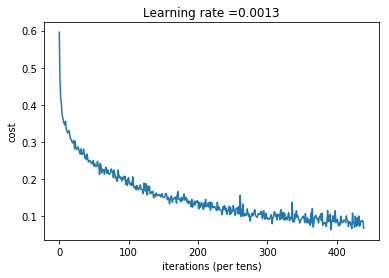

Parameters have been trained!
Train Accuracy: 0.976228
Test Accuracy: 0.951064


In [131]:
# Testing diff layer 80, 40, 20, 10 beta = 0.00001
# adding dropout  0.5, 0.6, 0.7, 1
parameters = model(trainX, trainY, testX,testY, beta = 0.00001, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

Cost after epoch 0: 0.595620
Cost after epoch 100: 0.300167
Cost after epoch 200: 0.267731
Cost after epoch 300: 0.237797
Cost after epoch 400: 0.214211
Cost after epoch 500: 0.203959
Cost after epoch 600: 0.170804
Cost after epoch 700: 0.162433
Cost after epoch 800: 0.145940
Cost after epoch 900: 0.161185
Cost after epoch 1000: 0.138440
Cost after epoch 1100: 0.137553
Cost after epoch 1200: 0.114303
Cost after epoch 1300: 0.106283
Cost after epoch 1400: 0.105118
Cost after epoch 1500: 0.096455
Cost after epoch 1600: 0.117925
Cost after epoch 1700: 0.106116
Cost after epoch 1800: 0.089228
Cost after epoch 1900: 0.075844
Cost after epoch 2000: 0.089822
Cost after epoch 2100: 0.081174
Cost after epoch 2200: 0.086657
Cost after epoch 2300: 0.075729
Cost after epoch 2400: 0.086448
Cost after epoch 2500: 0.060799
Cost after epoch 2600: 0.069096
Cost after epoch 2700: 0.071403
Cost after epoch 2800: 0.070404
Cost after epoch 2900: 0.061502


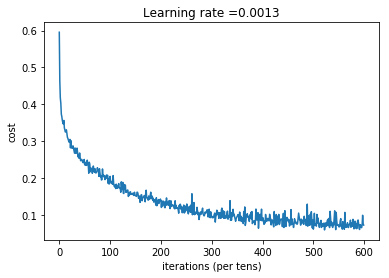

Parameters have been trained!
Train Accuracy: 0.985209
Test Accuracy: 0.940426


In [162]:
# Testing diff layer 80, 40, 20, 10 beta = 0.00001
# epoch = 3000
# adding dropout  0.5, 0.7, 0.9, 1
parameters = model(trainX, trainY, testX,testY, num_epochs = 3000, beta = 0.00001, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

Cost after epoch 0: 0.733343
Cost after epoch 100: 0.305039
Cost after epoch 200: 0.229869
Cost after epoch 300: 0.192603
Cost after epoch 400: 0.171347
Cost after epoch 500: 0.143735
Cost after epoch 600: 0.143636
Cost after epoch 700: 0.141848
Cost after epoch 800: 0.103204
Cost after epoch 900: 0.093616
Cost after epoch 1000: 0.104289
Cost after epoch 1100: 0.123398
Cost after epoch 1200: 0.089121
Cost after epoch 1300: 0.087974
Cost after epoch 1400: 0.066322
Cost after epoch 1500: 0.085061
Cost after epoch 1600: 0.065599
Cost after epoch 1700: 0.065592
Cost after epoch 1800: 0.061806
Cost after epoch 1900: 0.068376
Cost after epoch 2000: 0.084125
Cost after epoch 2100: 0.099822
Cost after epoch 2200: 0.077807
Cost after epoch 2300: 0.051672
Cost after epoch 2400: 0.062758
Cost after epoch 2500: 0.037910
Cost after epoch 2600: 0.048269
Cost after epoch 2700: 0.041251
Cost after epoch 2800: 0.043633
Cost after epoch 2900: 0.062958


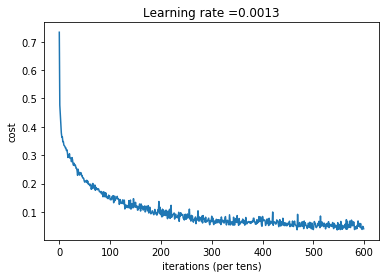

Parameters have been trained!
Train Accuracy: 0.985209
Test Accuracy: 0.929787


In [197]:
# Testing diff layer 100, 50, 25, 12, 5 beta = 0.00001
# epoch = 3000
# adding dropout  0.5, 0.7, 0.9, 1, 1
parameters = model(trainX, trainY, testX,testY, num_epochs = 3000, beta = 0.00001, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

Cost after epoch 0: 0.950852
Cost after epoch 100: 0.311339
Cost after epoch 200: 0.242401
Cost after epoch 300: 0.224558
Cost after epoch 400: 0.191235
Cost after epoch 500: 0.174027
Cost after epoch 600: 0.155418
Cost after epoch 700: 0.124975
Cost after epoch 800: 0.119681
Cost after epoch 900: 0.108829
Cost after epoch 1000: 0.105910
Cost after epoch 1100: 0.085068
Cost after epoch 1200: 0.111054
Cost after epoch 1300: 0.088596
Cost after epoch 1400: 0.095490
Cost after epoch 1500: 0.078500
Cost after epoch 1600: 0.097772
Cost after epoch 1700: 0.070001
Cost after epoch 1800: 0.070245
Cost after epoch 1900: 0.068629
Cost after epoch 2000: 0.062956
Cost after epoch 2100: 0.061796
Cost after epoch 2200: 0.056185
Cost after epoch 2300: 0.050107
Cost after epoch 2400: 0.054204
Cost after epoch 2500: 0.044696
Cost after epoch 2600: 0.039814
Cost after epoch 2700: 0.057943
Cost after epoch 2800: 0.047426
Cost after epoch 2900: 0.033562


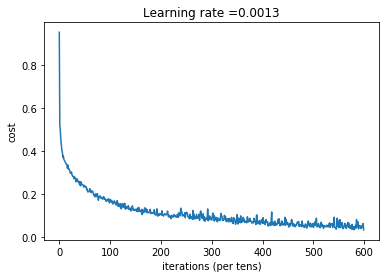

Parameters have been trained!
Train Accuracy: 0.989963
Test Accuracy: 0.953192


In [200]:
# Testing diff layer 100, 50, 25, 12, 5 beta = 0.00001
# epoch = 3000
# adding dropout  0.5, 0.7, 0.9, 1, 1
# mini-batch size = 128
parameters = model(trainX, trainY, testX,testY, num_epochs = 3000,minibatch_size = 128, beta = 0.00001, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

Cost after epoch 0: 1.330233
Cost after epoch 100: 0.345588
Cost after epoch 200: 0.283898
Cost after epoch 300: 0.250868
Cost after epoch 400: 0.231738
Cost after epoch 500: 0.199424
Cost after epoch 600: 0.175857
Cost after epoch 700: 0.178028
Cost after epoch 800: 0.162062
Cost after epoch 900: 0.141977
Cost after epoch 1000: 0.133541
Cost after epoch 1100: 0.119850
Cost after epoch 1200: 0.109883
Cost after epoch 1300: 0.108608
Cost after epoch 1400: 0.098798
Cost after epoch 1500: 0.110171
Cost after epoch 1600: 0.080501
Cost after epoch 1700: 0.085927
Cost after epoch 1800: 0.089773
Cost after epoch 1900: 0.083155
Cost after epoch 2000: 0.081882
Cost after epoch 2100: 0.090385
Cost after epoch 2200: 0.094672
Cost after epoch 2300: 0.073014
Cost after epoch 2400: 0.072854
Cost after epoch 2500: 0.065338
Cost after epoch 2600: 0.070743
Cost after epoch 2700: 0.059471
Cost after epoch 2800: 0.064236
Cost after epoch 2900: 0.062427


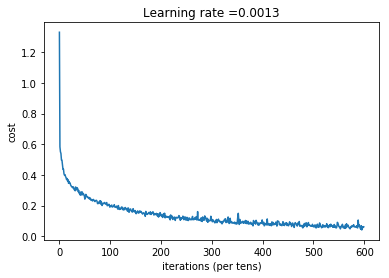

Parameters have been trained!
Train Accuracy: 0.969889
Test Accuracy: 0.931915


In [201]:
# Testing diff layer 100, 50, 25, 12, 5 beta = 0.00001
# epoch = 3000
# adding dropout  0.5, 0.7, 0.9, 1, 1
# mini-batch size = 128
parameters = model(trainX, trainY, testX,testY, num_epochs = 3000,minibatch_size = 256, beta = 0.00001, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

Cost after epoch 0: 2.090686
Cost after epoch 100: 0.438873
Cost after epoch 200: 0.358389
Cost after epoch 300: 0.329456
Cost after epoch 400: 0.274023
Cost after epoch 500: 0.265408
Cost after epoch 600: 0.228605
Cost after epoch 700: 0.203918
Cost after epoch 800: 0.163303
Cost after epoch 900: 0.176482
Cost after epoch 1000: 0.171771
Cost after epoch 1100: 0.159521
Cost after epoch 1200: 0.138874
Cost after epoch 1300: 0.134475
Cost after epoch 1400: 0.124413
Cost after epoch 1500: 0.134735
Cost after epoch 1600: 0.122499
Cost after epoch 1700: 0.105573
Cost after epoch 1800: 0.104678
Cost after epoch 1900: 0.106307
Cost after epoch 2000: 0.118593
Cost after epoch 2100: 0.098163
Cost after epoch 2200: 0.102440
Cost after epoch 2300: 0.100497
Cost after epoch 2400: 0.088568
Cost after epoch 2500: 0.077029
Cost after epoch 2600: 0.088670
Cost after epoch 2700: 0.086177
Cost after epoch 2800: 0.084466
Cost after epoch 2900: 0.079315


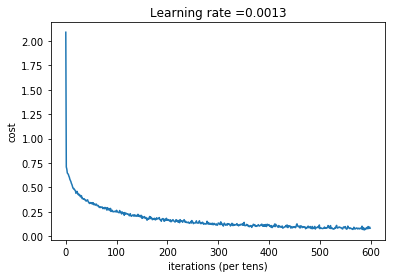

Parameters have been trained!
Train Accuracy: 0.980983
Test Accuracy: 0.938298


In [202]:
# Testing diff layer 100, 50, 25, 12, 5 beta = 0.00001
# epoch = 3000
# adding dropout  0.5, 0.7, 0.9, 1, 1
# mini-batch size = 128
parameters = model(trainX, trainY, testX,testY, num_epochs = 3000,minibatch_size = 512, beta = 0.00001, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

In [ ]:
# Testing diff layer 100, 50, 25, 12, 5 beta = 0.00001
# epoch = 3000
# adding dropout  0.5, 0.7, 0.9, 1, 1
# mini-batch size = 128
parameters = model(trainX, trainY, testX,testY, num_epochs = 3000,minibatch_size = 1, beta = 0.00001, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)